In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [15]:
df = pd.read_csv('/content/diabetes_data.csv')

In [16]:
df.head()

,Pregnancies,Glucose,Blood Pressure,BMI,Age,Outcome
0,6,83,73,40.6,75,0
1,3,164,118,23.8,36,1
2,12,117,119,26.6,75,0
3,14,84,60,40.5,49,0
4,10,109,65,24.5,18,1


In [17]:
df.shape

(100, 6)

In [18]:
# Unique features in categorical features
print(df['Outcome'].unique())
print(df['Age'].unique())
print(df['Pregnancies'].unique())


[0 1]
[75 36 49 18 73 22 62 21 33 41 72 19 66 45 44 37 29 67 52 77 50 78 68 60
 54 20 57 27 61 46 30 48 63 40 34 43 25 79 51 58 24 70 28 53 42 38 74 26
 65 35 56]
[ 6  3 12 14 10  7  4  9  2  5  1 11 13  0  8]


In [19]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
Blood Pressure,0
BMI,0
Age,0
Outcome,0


In [20]:
df.describe()

,Pregnancies,Glucose,Blood Pressure,BMI,Age,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,7.270000,136.770000,84.640000,29.713000,49.150000,0.43000
std,4.251809,39.121116,20.369079,8.408409,17.439868,0.49757
min,0.000000,70.000000,50.000000,15.400000,18.000000,0.00000
25%,3.750000,104.750000,68.750000,23.325000,35.750000,0.00000
50%,7.000000,132.000000,82.000000,30.500000,49.500000,0.00000
75%,11.000000,170.500000,101.250000,36.175000,65.250000,1.00000
max,14.000000,199.000000,121.000000,44.700000,79.000000,1.00000


In [21]:
# One hot encoding
# if there is three unique features converted it as 1,0 and  "drop_first" drop the first column , if both of them are  0 then droped features is take
final_dataset = pd.get_dummies(df,drop_first=True)

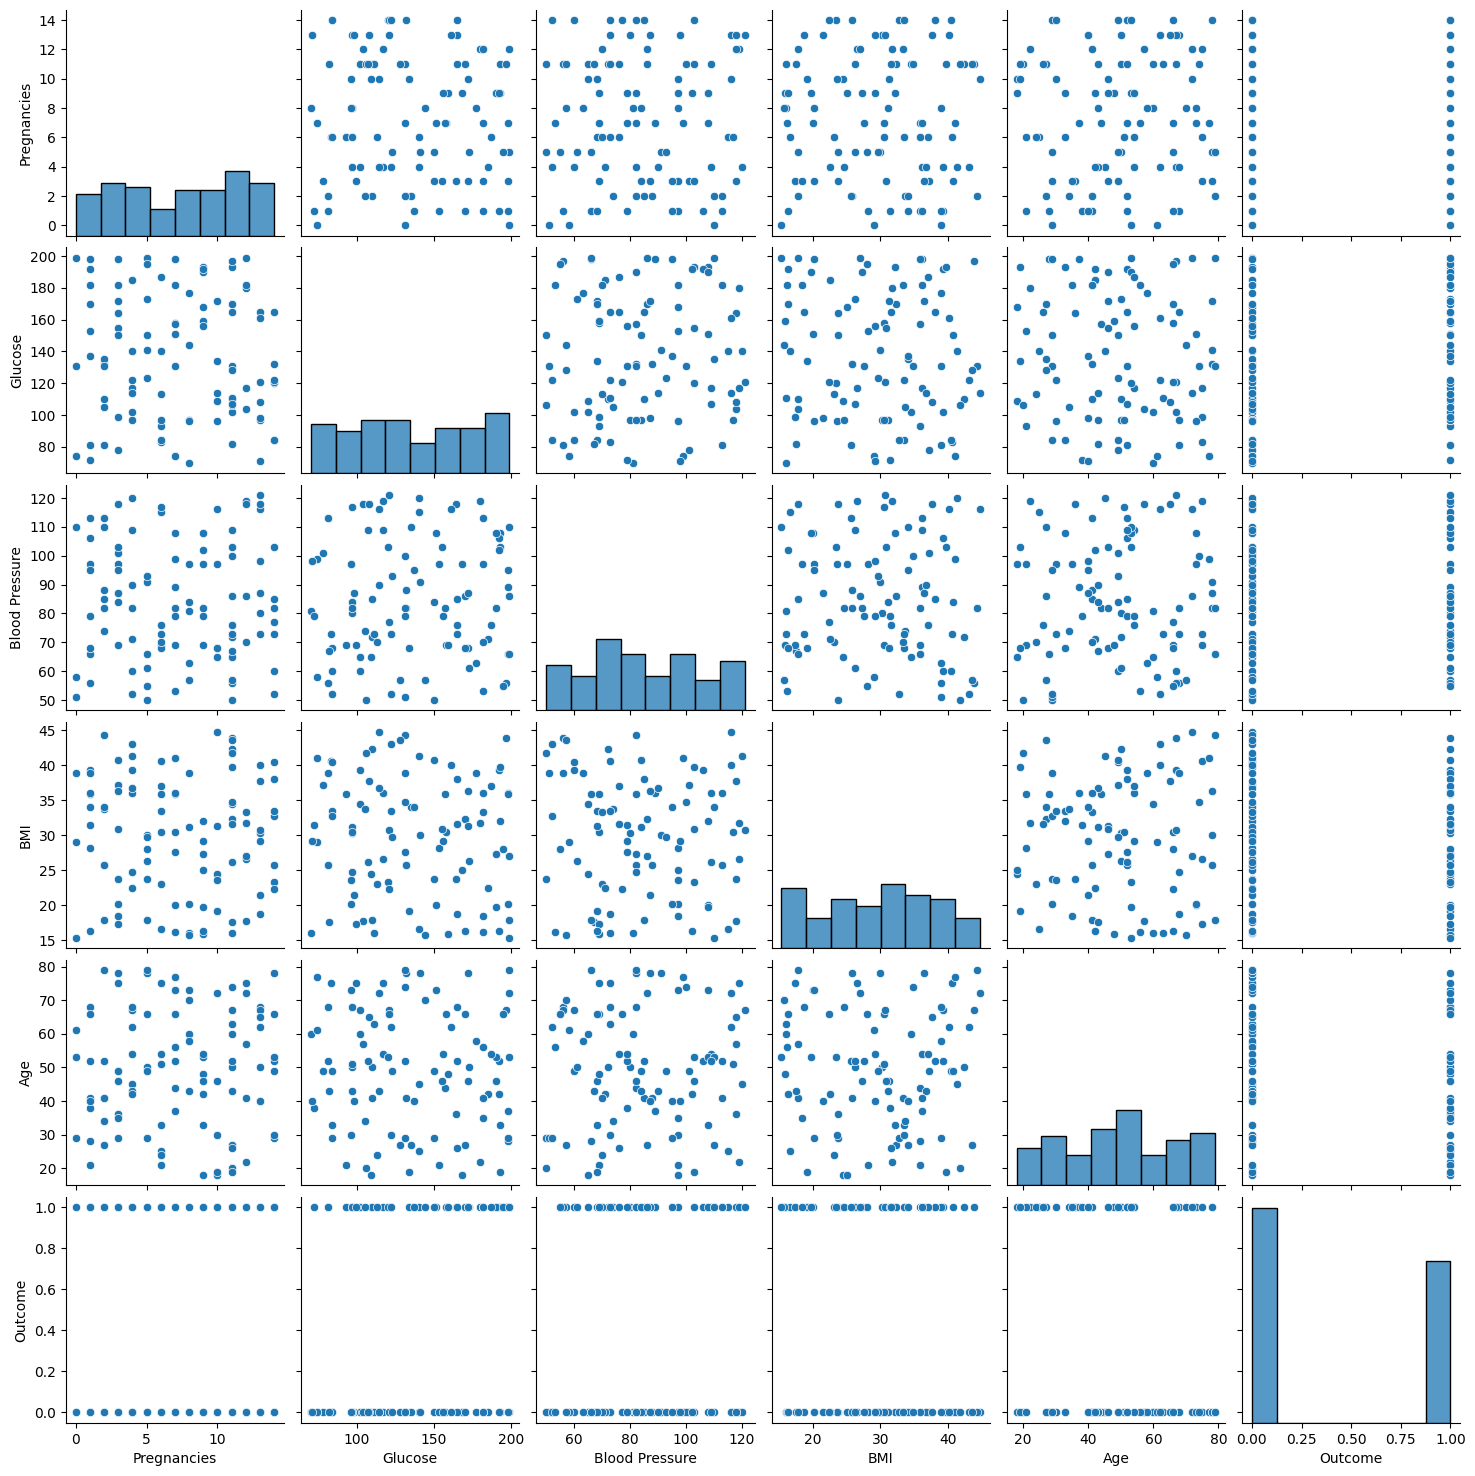

In [22]:
sns.pairplot(final_dataset)

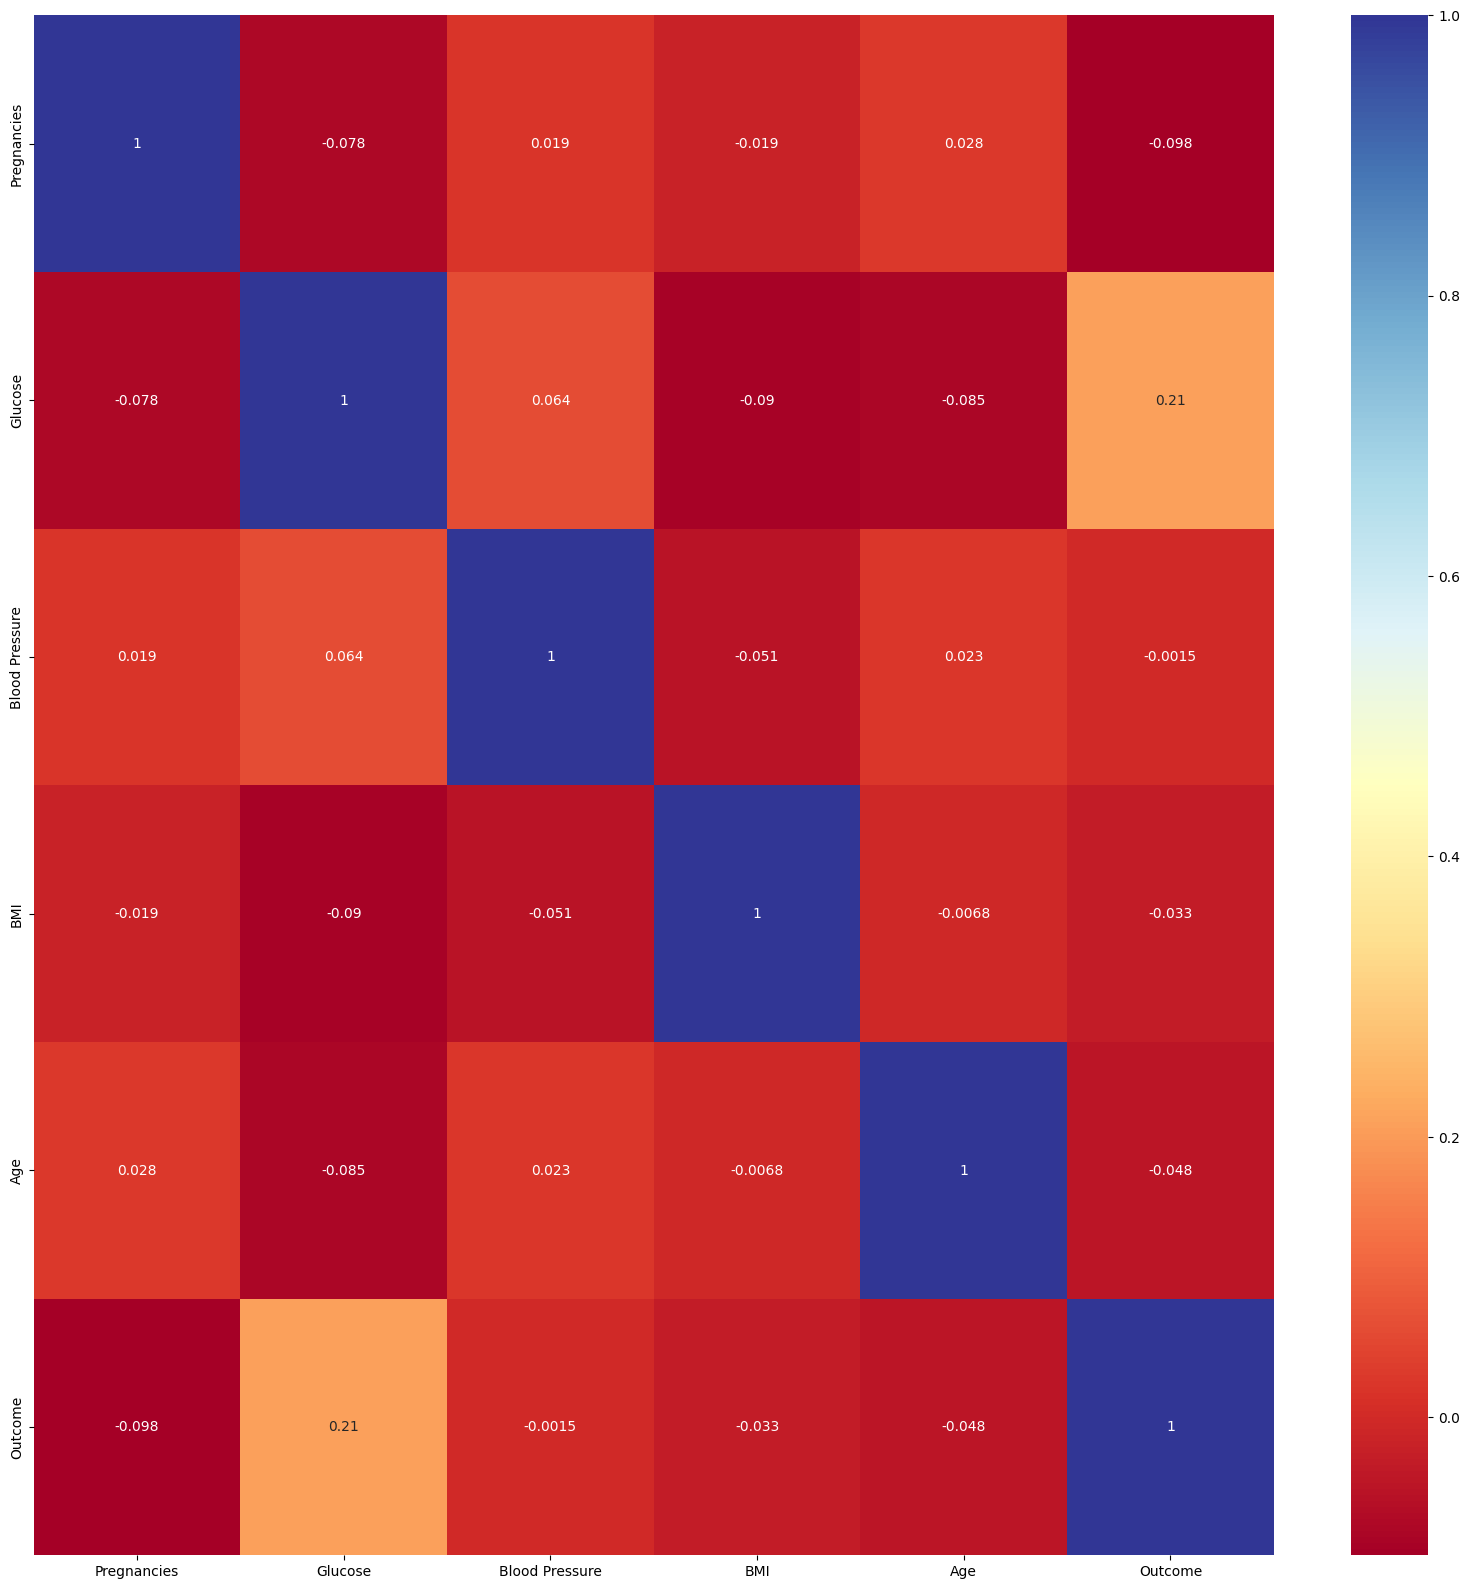

In [23]:
# To get more info
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Heat map
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlBu')

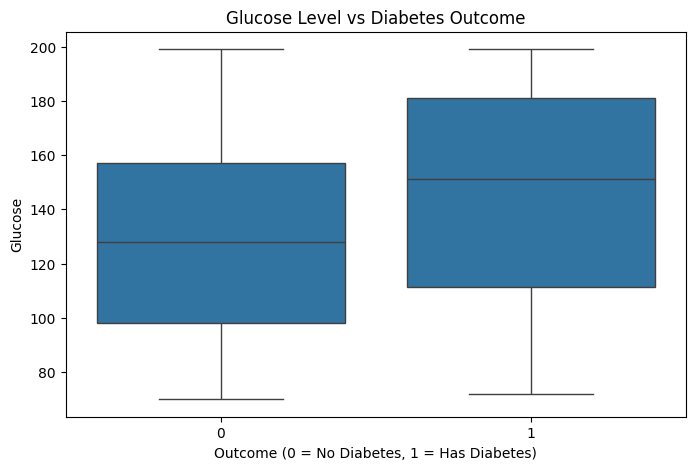

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Level vs Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Has Diabetes)')
plt.ylabel('Glucose')
plt.show()


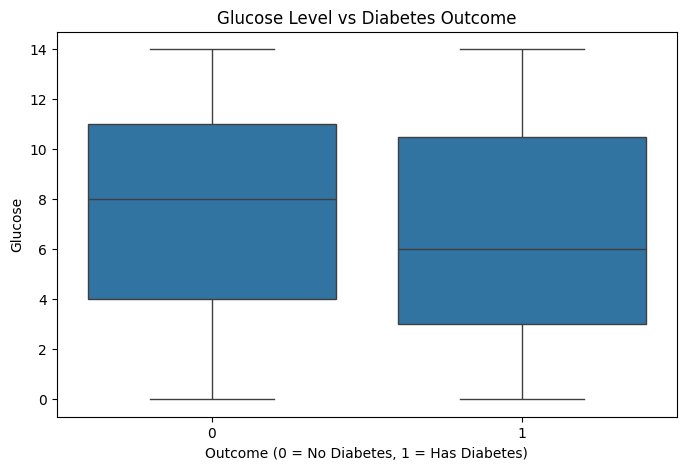

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Glucose Level vs Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Has Diabetes)')
plt.ylabel('Glucose')
plt.show()


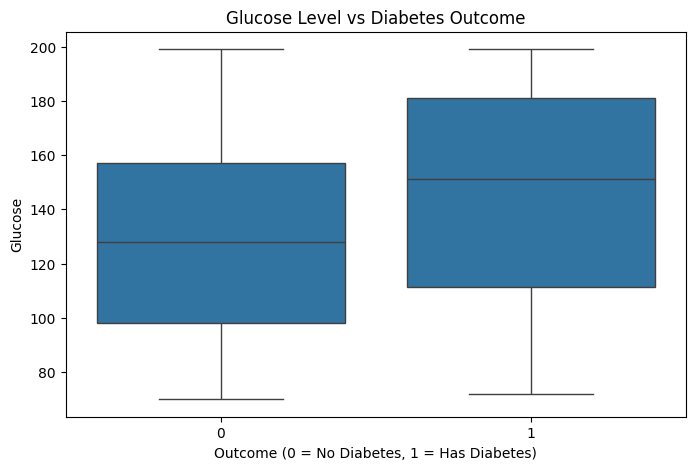

In [27]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Level vs Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Has Diabetes)')
plt.ylabel('Glucose')
plt.show()

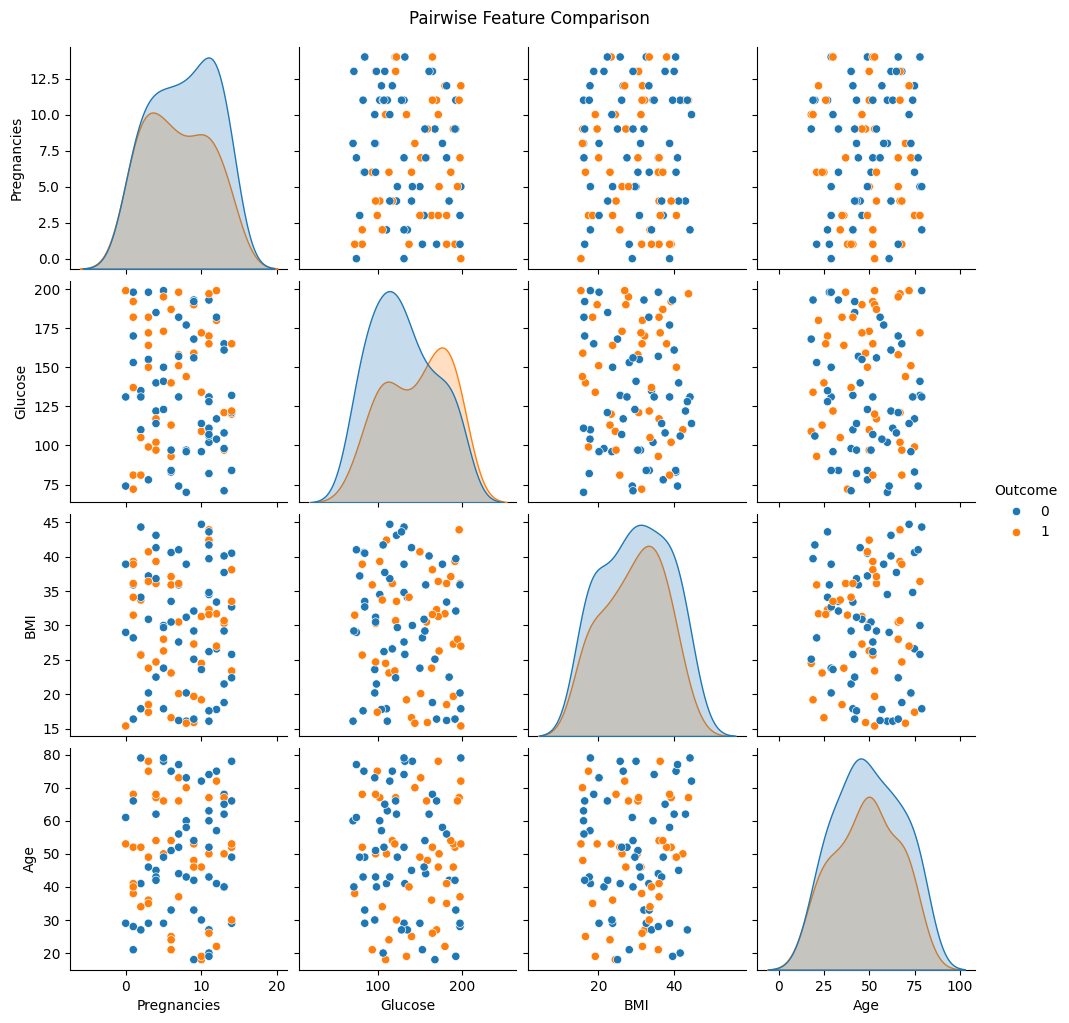

In [28]:
sns.pairplot(df[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.suptitle('Pairwise Feature Comparison', y=1.02)
plt.show()

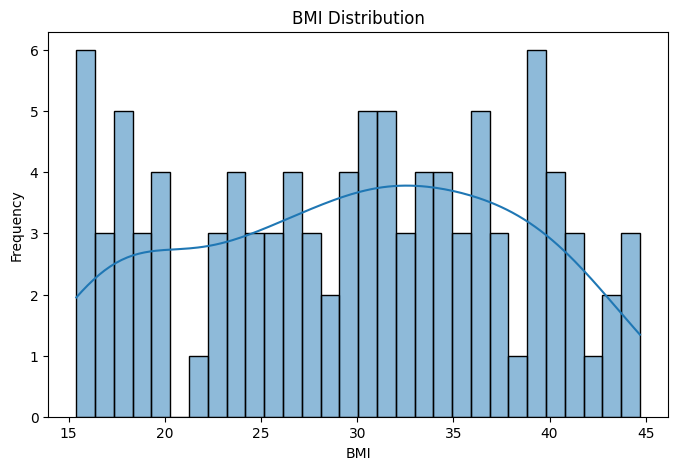

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [31]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib  # for saving/loading model

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Fit models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [46]:
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    if accuracy_score(y_test, y_pred)*100 >= 70:
      best_model = joblib.dump(model, 'best.pkl')

    print("==============================================")


Logistic Regression
Accuracy : 0.7500
Precision: 0.6250
Recall   : 0.7143
Decision Tree
Accuracy : 0.5000
Precision: 0.2857
Recall   : 0.2857
Random Forest
Accuracy : 0.5000
Precision: 0.3636
Recall   : 0.5714


In [48]:
best_model_loaded = joblib.load('/content/best.pkl')

input_data = (6	,83	,73	,40.6	,75)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('Diabetes Patient')

else:
  print('Not a Diabetes Patient')


[1]
Diabetes Patient


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Findings
BMI and Age also showed high influence,
so ther are strong predictors.
